In [16]:
import mpmath as mp
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from mpmath import *
from mpl_toolkits.mplot3d import Axes3D
mp.dps = 15; mp.pretty = True

In [17]:
######################## Functions ########################

In [284]:
# Normalise X value with choosen range
def xnorm (x,maxrange,minrange):
    # Separate the dimensions
    n=[]
    for j in range(x.shape[1]):
        temp=[]
        for i in range(x.shape[0]):
            temp.append(x[i][j])
        rex=(maxrange-minrange)/(np.max(temp)-np.min(temp))*(np.array(temp)-np.min(temp))+minrange
        n.append(rex)
    a=[]
    for i in range(x.shape[0]):
        r=[]
        for j in range(x.shape[1]):
            r.append(n[j][i])
        a.append(r)
    return np.array(a)
# Normalise Y value with choosen range
def ynorm (func,maxrange,minrange):
    rex=(maxrange-minrange)/(np.max(func)-np.min(func))*(np.array(func)-np.min(func))+minrange
    return rex
# Decode Normalised integrated value
def decode(func,x,maxrange,minrange,inte):
    v={}
    for j in range(x.shape[1]):
        temp=[]
        for i in range(x.shape[0]):
            temp.append(x[i][j])
        v[j]=np.max(temp)-np.min(temp)
    product=1
    for i in range(x.shape[1]):
        product=product*v[i]
    vs=product
    vss=(maxrange-minrange)**x.shape[1]
    f=np.max(func)-np.min(func)
    yy=maxrange-minrange
    return vs*f*inte/(vss*yy)+(np.min(func)-f/yy*minrange)*vs
# Initial function
def init(dim):
    # number of function dimension
    dim = dim
    # training set of N
    N = 3000*dim**3
    N = 30000
    # random x grid
    x = np.random.random((N,dim))
    # set the maximum dimension
    MAX_DIM=20
    # set the random variables of u and c
    np.random
    u = np.random.random((dim,))
    cs = np.random.random((MAX_DIM,))
    cs = cs[:x.shape[1]]
    return dim, N, x, u, cs
# function for fitting
# y value
def oscil(x):
    arg = np.dot(x,cs)
    arg += u[0] * 2 * np.pi
    return np.cos(arg)
def prod(x):
    temp={}
    for i in range(x.shape[1]):
        temp2=[]
        for j in range(x.shape[0]):
            temp2.append(x[j][i])
        temp[i]=(cs[i]**(-2)+(temp2-u[i])**2)**(-1)
    product=1
    for i in range(x.shape[1]):
        product=product*temp[i]
    return product
# function graph
def graph(dim,x,y):
    if dim == 1:
        plt.scatter(x,y)
        plt.show()
    elif dim == 2:
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(projection='3d')
        x1=[j[0] for j in x]
        x2=[j[1] for j in x]
        ax.scatter(x1, x2, y)
        plt.show()
    elif dim == 3:
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(projection='3d')
        x1 = [j[0] for j in x]
        x2 = [j[1] for j in x]
        x3 = [j[2] for j in x]
        img = ax.scatter(x1, x2, x3, c=y, cmap=plt.hot())
        fig.colorbar(img)
        plt.show()
    elif dim == 4:
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(projection='3d')
        x1 = [j[0] for j in x]
        x2 = [j[1] for j in x]
        x3 = [j[2] for j in x]
        x4 = [j[3]*30 for j in x]
        img = ax.scatter(x1, x2, x3, c=y,s=x4, cmap=plt.hot())
        fig.colorbar(img)
        plt.show()
# number of nodes (k) tunable parameter k1,k2
def node(dim,N):
    k1 = 4.33
    k2 = 16
    #k = math.floor(((np.log10(N)**(-k1))*(k2*N/(dim+2))))
    k = math.floor(10*dim*np.log10(N)**1.5)
    return k
# weight and bias of input and output
def coe(mlpr):
    weight_input = []
    weight_output = mlpr.coefs_[1]
    bias_input = mlpr.intercepts_[0]
    bias_output = mlpr.intercepts_[1]
    for i in range(dim):
        weight_input.append(mlpr.coefs_[0][i])
    return weight_input, weight_output, bias_input, bias_output
# weight and bias of input and output
def coe2(mlpr):
    weight_input = []
    weight_output = mlpr.coefs_[1]
    bias_input = mlpr.intercepts_[0]
    bias_output = mlpr.intercepts_[1]
    for i in range(dim):
        weight_input.append(mlpr.coefs_[0][i])
    return weight_input, weight_output, bias_input, bias_output



# sign of sigmoid integration
def addIndex(l):
    ret = []
    for v in l:
        ret.append(v+[0])
        ret.append(v+[1])
    return ret 

def sigs(l):
    return int((-1)**(sum(l)-len(l)))

def lims(n):
    ret = [[]]
    for i in range(n):
        ret = addIndex(ret)
    if n%2==0:
        signs = [sigs(x) for x in ret]
    else:
        signs = [-1*sigs(x) for x in ret]
    return ret, signs

# numerical calculation of integral
al = 0
be = 1
def integral(node,dim):
    if dim == 1:
        temp = []
        for i in range(node):
            po = (polylog(dim,-np.exp(-bias_input[i]-weight_input[0][i]*al))
                  -polylog(dim,-np.exp(-bias_input[i]-weight_input[0][i]*be)))       
            temp.append(weight_output[i]*((be-al)+po/weight_input[0][i]))
        result = bias_output*(be-al)+sum(temp)
        return result[0]
    else :
        temp=[]
        poly =[]
        for i in range(len(lims(dim)[1])):
            weight=[]
            for j in range(len(lims(dim)[0][i])):
                arg = weight_input[j]*lims(dim)[0][i][j]
                weight.append(arg)
            po=[]
            for j in range(node):
                po.append(lims(dim)[1][i]*polylog(dim,-np.exp(-bias_input-sum(weight))[j]))
            poly.append(np.array(po))
        product=1
        for j in range(len(weight_input)):
            product = product*weight_input[j]
        temp.append(1+sum(poly)/product)
        result=bias_output+np.dot(temp,weight_output)
    return float(result[0][0])
# integral for identity activation
def integral2(node,dim):
    arg=bias_input2*1+sum(weight_input2)*(1/2)
    temp=[]
    for i in range(node):
        temp.append(weight_output2[i]*arg[i])
        result=bias_output2+sum(temp)
    return float(result[0])
# integral for relu activation
def integral3(node,dim):
    arg=bias_input3*1+sum(weight_input3)*(1/2)
    for i in range(node):
        temp=[]
        if arg[i] > 0:
            temp.append(weight_output3[i]*arg[i])
        else :
            temp.append(0)
        re=bias_output3+sum(temp)
    return float(re[0])
# integral for relu activation
def integral4(node,dim):
    arg=bias_input3*1+(1/math.factorial(dim+1))*sum(np.array(weight_input3)**(dim+1))
    for i in range(node):
        temp=[]
        if arg[i] > 0:
            temp.append(weight_output3[i]*arg[i])
        else :
            temp.append(0)
        re=bias_output3+sum(temp)
    return float(re[0])


# analytical integral value
def symbolicval(ndiff, nfix):
    arest = cs[ndiff:]
    adiff = cs[:ndiff]
    norm = 2**ndiff*np.prod(np.sin(adiff/2))/np.prod(adiff)
    arg = 2*np.pi*u[0] + sum(adiff)/2
    if nfix == 0:
        F = norm*np.cos(arg)
    else:
        #def F(x):
            #return norm*np.cos(arg+np.dot(x[ndiff:],arest))
        xt=x.T[ndiff:]
        F = norm*np.cos(arg+np.dot(xt.T,arest))
    return F
def symbolicval2(ndiff, nfix):
    temp=[]
    for i in range(ndiff):
        temp.append(cs[i]*(np.arctan(cs[i]*u[i])+np.arctan(cs[i]-cs[i]*u[i])))
    product=1
    for i in range(ndiff):
        product=product*temp[i]
    if nfix ==0:
        F=product
    else:
        temp={}
        for i in range(x.shape[1]):
            temp2=[]
            for j in range(x.shape[0]):
                temp2.append(x[j][i])
            temp[i]=(cs[i]**(-2)+(temp2-u[i])**2)**(-1)
        product2=1
        for i in range(nfix):
            product2=product2*temp[i+nfix]
            F=product2
        return F*prod(x)
    return F

In [285]:
################### Initialize value ######################

size of x, cs and u
(30000, 4)
(4,)
(4,)
original function graph(dim<=4)


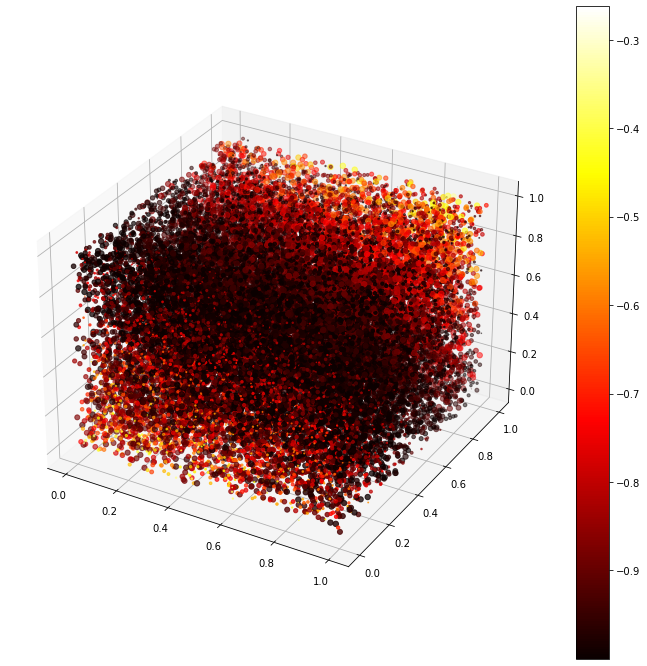

number of nodes
378
[-0.93991995 -0.95498939 -0.82005849 ... -0.86331446 -0.99798122
 -0.93644193]


In [286]:
# Original values
dim, N, x, u, cs = init(4)
y = oscil(x)
#y = prod(x)
# test and validation divide 95%
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.05)
k = node(dim,N)

print('size of x, cs and u')
print(x.shape)
print(cs.shape)
print(u.shape)
print('original function graph(dim<=4)')
graph(dim,x,y)
print('number of nodes')
print(k)
print(y)

In [114]:
# Normalised value
ys = ynorm(oscil(x),1,0)
xs = xnorm(x,1,0)
# test and validation divide 95%
trainxs, testxs, trainys, testys = train_test_split(xs, ys, test_size = 0.05)

In [23]:
#################### Run multi layer perceptron #####################

In [8]:
start = timeit.default_timer()
# mlpregression with logistic activation
mlp_reg = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic', n_iter_no_change=100,
                       solver = 'adam', learning_rate_init=0.001,
                       learning_rate ='adaptive', tol=1e-10)
# fitting NN
mlp_reg.fit(trainx, trainy)
print('convergence: ',len(mlp_reg.loss_curve_))
print('loss: ', mlp_reg.best_loss_)
stop = timeit.default_timer()
print('Time: ', stop - start)  

convergence:  116
loss:  2.2819890036498295e-05
Time:  26.938668957999997


In [19]:
start = timeit.default_timer()
# mlpregression with logistic activation with changed hyperparameter sgd
mlp_reg_sgd = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic', learning_rate ='adaptive',
                       solver = 'sgd', momentum=0.99, n_iter_no_change=100,
                       learning_rate_init=0.0005, tol=1e-10)
# fitting NN
mlp_reg_sgd.fit(trainx, trainy)
print('convergence: ',len(mlp_reg_sgd.loss_curve_))
print('loss: ', mlp_reg_sgd.best_loss_)
stop = timeit.default_timer()
print('Time: ', stop - start)  

convergence:  450
loss:  5.0429421328078655e-05
Time:  101.86619570799985


/Users/minwookim/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [287]:
start = timeit.default_timer()
# mlpregression with logistic activation with changed hyperparameter lbfgs
mlp_reg_lb = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic',
                       solver = 'lbfgs', early_stopping=True,
                       learning_rate_init=0.0005, tol=1e-10)
# fitting NN
mlp_reg_lb.fit(trainx, trainy)
print('Convergence: ',mlp_reg_lb.n_iter_)
stop = timeit.default_timer()
print('Time: ', stop - start)  

Convergence:  8
Time:  1.8443477080145385


In [21]:
start = timeit.default_timer()
# mlpregression with identity activation
mlp_reg_id = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 1000000000,activation = 'identity',
                       solver = 'adam', learning_rate ='adaptive', n_iter_no_change=100,
                       learning_rate_init=0.0005, tol=1e-10)
# fitting NN
mlp_reg_id.fit(trainx, trainy)
print('convergence: ',len(mlp_reg_id.loss_curve_))
print('loss: ', mlp_reg_id.best_loss_)
stop = timeit.default_timer()
print('Time: ', stop - start)  

convergence:  30
loss:  4.9396889795563605e-05
Time:  4.7820343749999665


/Users/minwookim/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [22]:
start = timeit.default_timer()
# mlpregression with identity activation with changed hyperparameter sgd
mlp_reg_id_sgd = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 1000000000,activation = 'identity', n_iter_no_change=100,
                       solver = 'sgd', momentum=0.99, learning_rate ='adaptive',
                       learning_rate_init=0.0005, tol=1e-10)
# fitting NN
mlp_reg_id_sgd.fit(trainx, trainy)
print('convergence: ',len(mlp_reg_id_sgd.loss_curve_))
print('loss: ', mlp_reg_id_sgd.best_loss_)
stop = timeit.default_timer()
print('Time: ', stop - start)  

convergence:  11
loss:  4.927035879643772e-05
Time:  2.007895292000285


/Users/minwookim/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [9]:
start = timeit.default_timer()
# mlpregression with identity activation with changed hyperparameter lbfgs
mlp_reg_id_lb = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 1000000000,activation = 'identity',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
# fitting NN
mlp_reg_id_lb.fit(trainx, trainy)
print('Convergence: ',mlp_reg_id_lb.n_iter_)
stop = timeit.default_timer()
print('Time: ', stop - start)  

Convergence:  9
Time:  6.788873290999987


In [131]:
start = timeit.default_timer()
# mlpregression with relu activation
mlp_reg_re = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 1000000000,activation = 'relu', n_iter_no_change=100,
                       solver = 'adam', learning_rate ='adaptive',
                       learning_rate_init=0.0005, tol=1e-10)
# fitting NN
mlp_reg_re.fit(trainx, trainy)
print('convergence: ',len(mlp_reg_re.loss_curve_))
print('loss: ', mlp_reg_re.best_loss_)
stop = timeit.default_timer()
print('Time: ', stop - start)  

convergence:  1643
loss:  6.522073959060402e-07
Time:  183.03904545799742


In [132]:
start = timeit.default_timer()
# mlpregression with relu activation with changed hyperparameter sgd
mlp_reg_re_sgd = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 1000000000,activation = 'relu', n_iter_no_change=100,
                       solver = 'sgd', momentum=0.99, learning_rate ='adaptive',
                       learning_rate_init=0.0005, tol=1e-10)
# fitting NN
mlp_reg_re_sgd.fit(trainx, trainy)
print('convergence: ',len(mlp_reg_re_sgd.loss_curve_))
print('loss: ', mlp_reg_re_sgd.best_loss_)
stop = timeit.default_timer()
print('Time: ', stop - start)  

convergence:  4888
loss:  1.8650564456558822e-06
Time:  1042.0541801660002


/Users/minwookim/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [133]:
start = timeit.default_timer()
# mlpregression with relu activation with changed hyperparameter lbfgs
mlp_reg_re_lb = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 1000000000,activation = 'relu',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
# fitting NN
mlp_reg_re_lb.fit(trainx, trainy)
print('Convergence: ',mlp_reg_re_lb.n_iter_)
stop = timeit.default_timer()
print('Time: ', stop - start)  

KeyboardInterrupt: 

In [24]:
start = timeit.default_timer()
# Normalised value running
# mlpregression with logistic activation
mlp_reg3 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000000,activation = 'logistic', n_iter_no_change=100,
                       solver = 'adam', learning_rate ='adaptive',
                       learning_rate_init=0.001, tol=1e-10)
# fitting NN
mlp_reg3.fit(trainxs, trainys)
print('convergence: ',len(mlp_reg3.loss_curve_))
print('loss: ', mlp_reg3.best_loss_)
stop = timeit.default_timer()
print('Time: ', stop - start)  

convergence:  7
loss:  0.00021190016381095018
Time:  1.7810515840001244


/Users/minwookim/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [25]:
start = timeit.default_timer()
# Normalised value running with changed hyperparameter sgd
# mlpregression with logistic activation
mlp_reg3_sgd = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000000,activation = 'logistic', n_iter_no_change=100,
                       solver = 'sgd', momentum=0.99, learning_rate ='adaptive',
                       learning_rate_init=0.001, tol=1e-10)
# fitting NN
mlp_reg3_sgd.fit(trainxs, trainys)
print('convergence: ',len(mlp_reg3_sgd.loss_curve_))
print('loss: ', mlp_reg3_sgd.best_loss_)
stop = timeit.default_timer()
print('Time: ', stop - start)  

convergence:  15
loss:  0.00019827157863386231
Time:  3.545771500000228


/Users/minwookim/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [10]:
start = timeit.default_timer()
# Normalised value running with changed hyperparameter lbfgs
# mlpregression with logistic activation
mlp_reg3_lb = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000000,activation = 'logistic',
                       solver = 'lbfgs',
                       learning_rate_init=0.001, tol=1e-10)
# fitting NN
mlp_reg3_lb.fit(trainxs, trainys)
print('Convergence: ',mlp_reg3_lb.n_iter_)
stop = timeit.default_timer()
print('Time: ', stop - start)  

Convergence:  18
Time:  36.73443829200002


In [113]:
#start = timeit.default_timer()
# mlpregression with 2 layer identity activation
#mlp_reg_id2 = MLPRegressor(hidden_layer_sizes=(k,k,),max_iter = 1000000000,activation = 'identity', n_iter_no_change=100,solver = 'adam', learning_rate ='adaptive',learning_rate_init=0.0005, tol=1e-10)
# fitting NN
#mlp_reg_id2.fit(trainx, trainy)
#print('Max iteration: ',mlp_reg_id2.max_iter)
#print('convergence: ',len(mlp_reg_id2.loss_curve_))
#print('loss: ', mlp_reg_id2.best_loss_)
#stop = timeit.default_timer()
#print('Time: ', stop - start)  

In [85]:
#print(mlp_reg_id2.coefs_[1])
#print('------------------------------------------------------------------')
#print(mlp_reg_id2.intercepts_)

In [86]:
####################### Prediction ###################

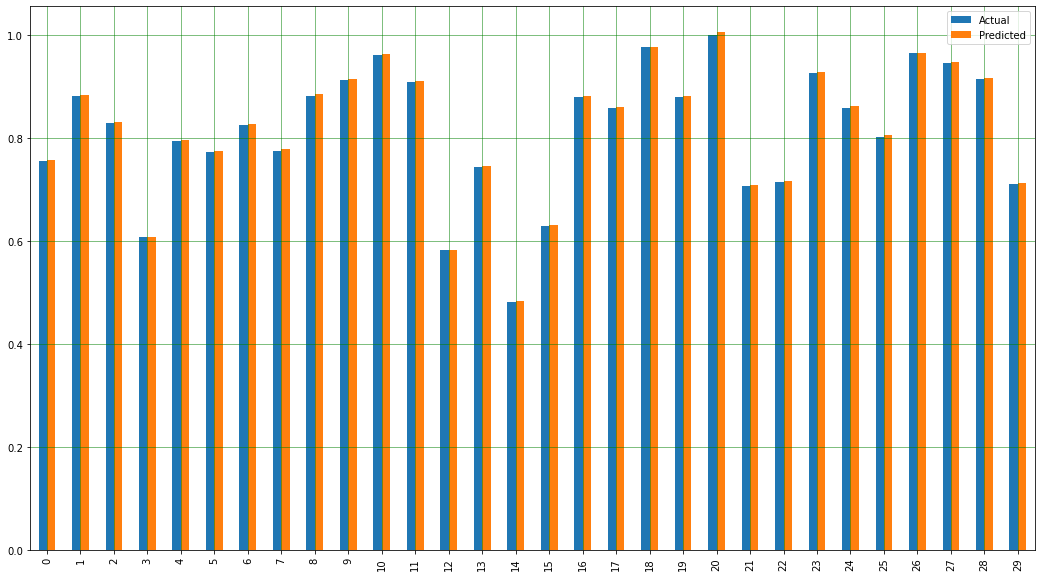

Mean Absolute Error: 0.0019762641908219643
Mean Squared Error: 5.478081421479874e-06
Root Mean Squared Error: 0.0023405301582077242


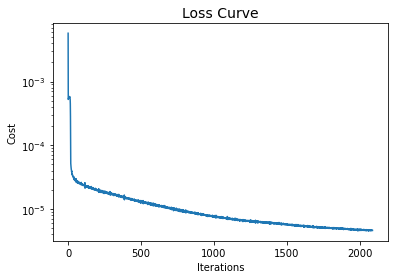

In [231]:
# predict the fitting
y_pred = mlp_reg.predict(testx)
df_temp = pd.DataFrame({'Actual': testy, 'Predicted': y_pred})
df_temp.head()
# graph of predict and validation
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
# MSE and Loss
print('Mean Absolute Error:', metrics.mean_absolute_error(testy, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testy, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testy, y_pred)))
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.yscale('log')
plt.show()

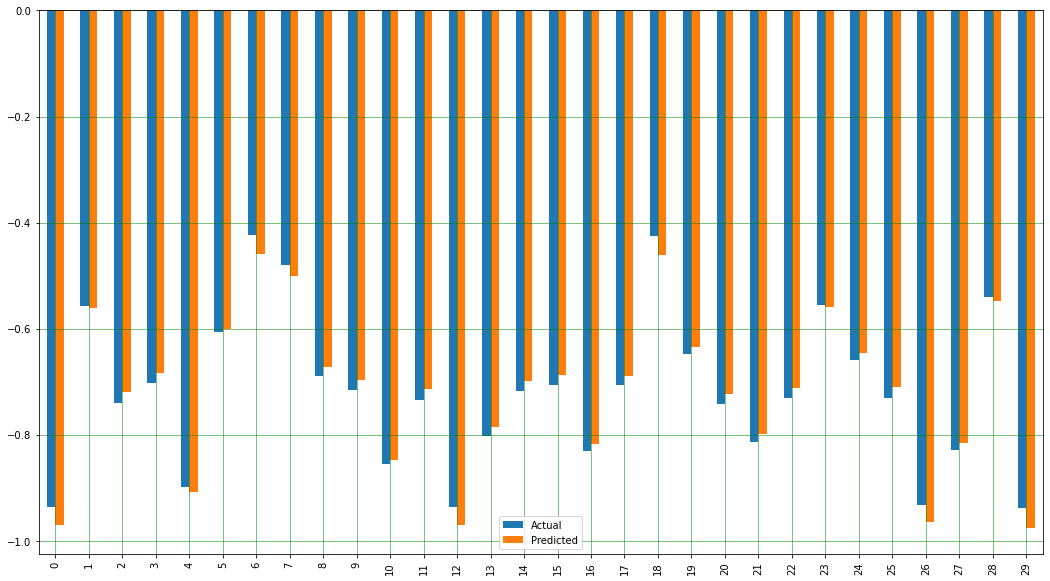

Mean Absolute Error: 0.01706428435742462
Mean Squared Error: 0.0004001542437642436
Root Mean Squared Error: 0.0200038557224412


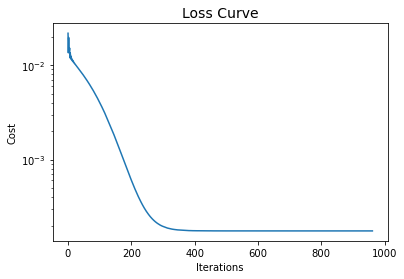

In [53]:
# predict the fitting with changed hyperparameter
y_pred = mlp_reg_sgd.predict(testx)
df_temp = pd.DataFrame({'Actual': testy, 'Predicted': y_pred})
df_temp.head()
# graph of predict and validation
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
# MSE and Loss
print('Mean Absolute Error:', metrics.mean_absolute_error(testy, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testy, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testy, y_pred)))
plt.plot(mlp_reg_sgd.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.yscale('log')
plt.show()

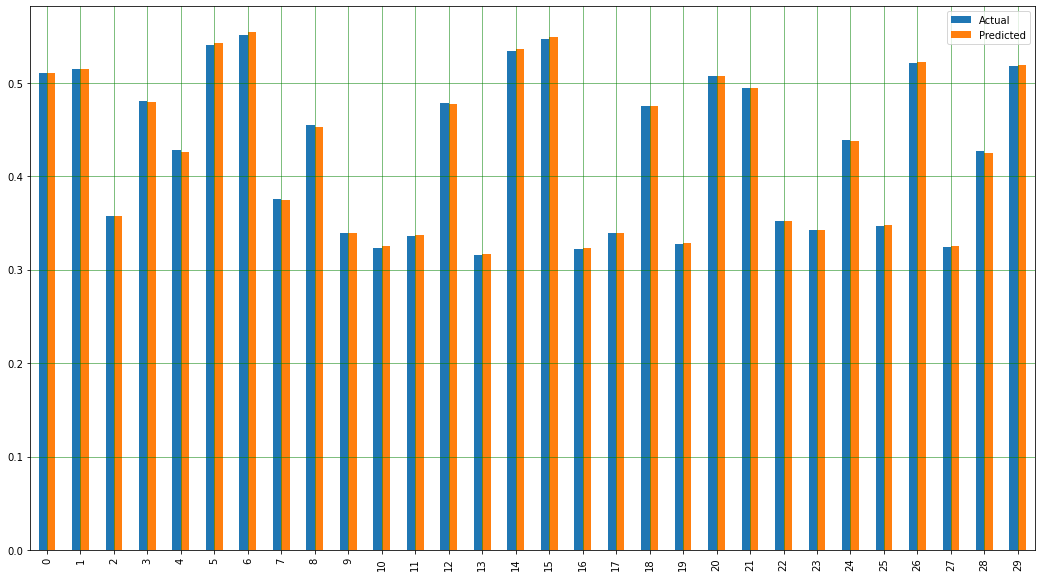

Mean Absolute Error: 0.0010778114540147725
Mean Squared Error: 1.6520745815286039e-06
Root Mean Squared Error: 0.0012853305339594963


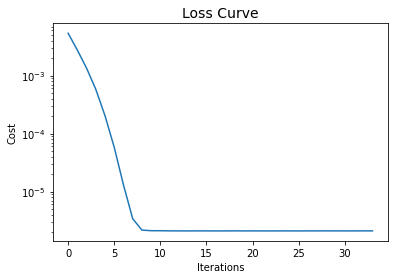

In [595]:
# predict the fitting
y_pred = mlp_reg_id.predict(testx)
df_temp = pd.DataFrame({'Actual': testy, 'Predicted': y_pred})
df_temp.head()
# graph of predict and validation
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
# MSE and Loss
print('Mean Absolute Error:', metrics.mean_absolute_error(testy, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testy, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testy, y_pred)))
plt.plot(mlp_reg_id.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.yscale('log')
plt.show()

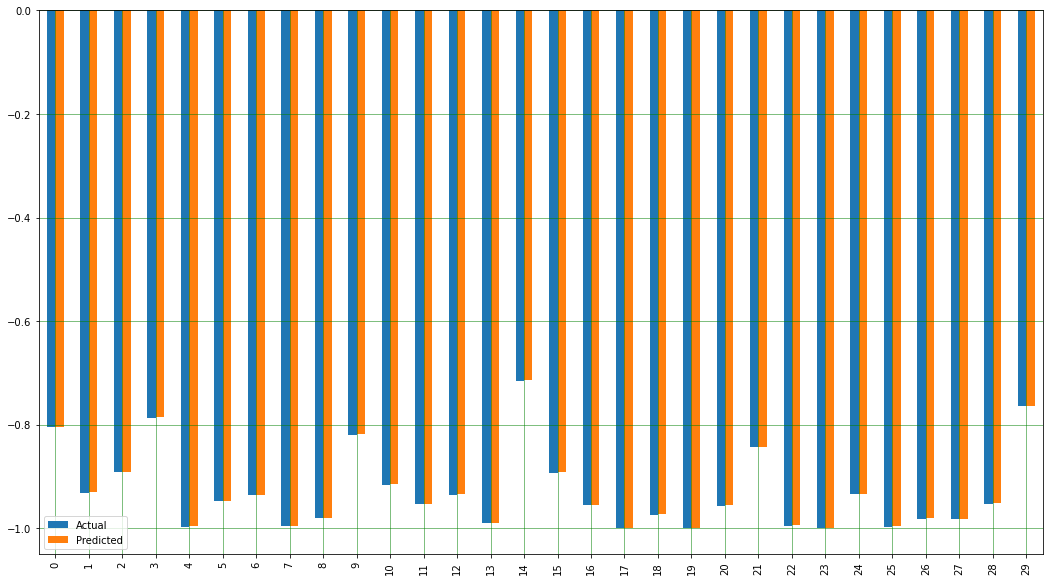

Mean Absolute Error: 0.001073768810857139
Mean Squared Error: 1.291563083743879e-06
Root Mean Squared Error: 0.001136469570091465


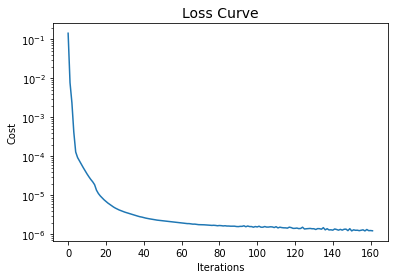

In [363]:
# predict the fitting
y_pred = mlp_reg_re.predict(testx)
df_temp = pd.DataFrame({'Actual': testy, 'Predicted': y_pred})
df_temp.head()
# graph of predict and validation
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
# MSE and Loss
print('Mean Absolute Error:', metrics.mean_absolute_error(testy, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testy, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testy, y_pred)))
plt.plot(mlp_reg_re.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.yscale('log')
plt.show()

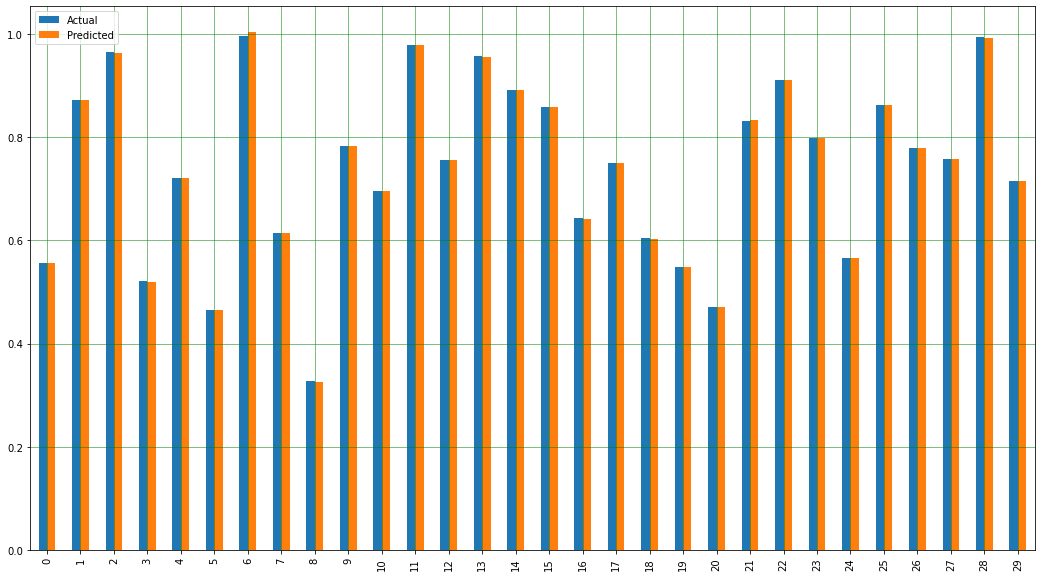

Mean Absolute Error: 0.0007553708118004195
Mean Squared Error: 1.5907271538785176e-06
Root Mean Squared Error: 0.0012612403236015402


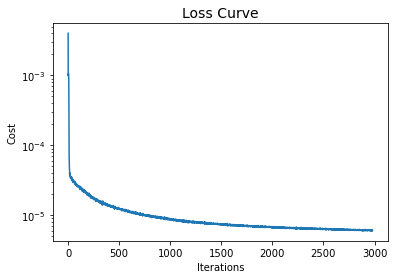

In [232]:
# predict the fitting of normalised value
y_preds = mlp_reg3.predict(testxs)
df_temps = pd.DataFrame({'Actual': testys, 'Predicted': y_preds})
df_temps.head()
# graph of predict and validation
df_temps = df_temps.head(30)
df_temps.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
# MSE and Loss
print('Mean Absolute Error:', metrics.mean_absolute_error(testys, y_preds))  
print('Mean Squared Error:', metrics.mean_squared_error(testys, y_preds))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testys, y_preds)))
plt.plot(mlp_reg3.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.yscale('log')
plt.show()

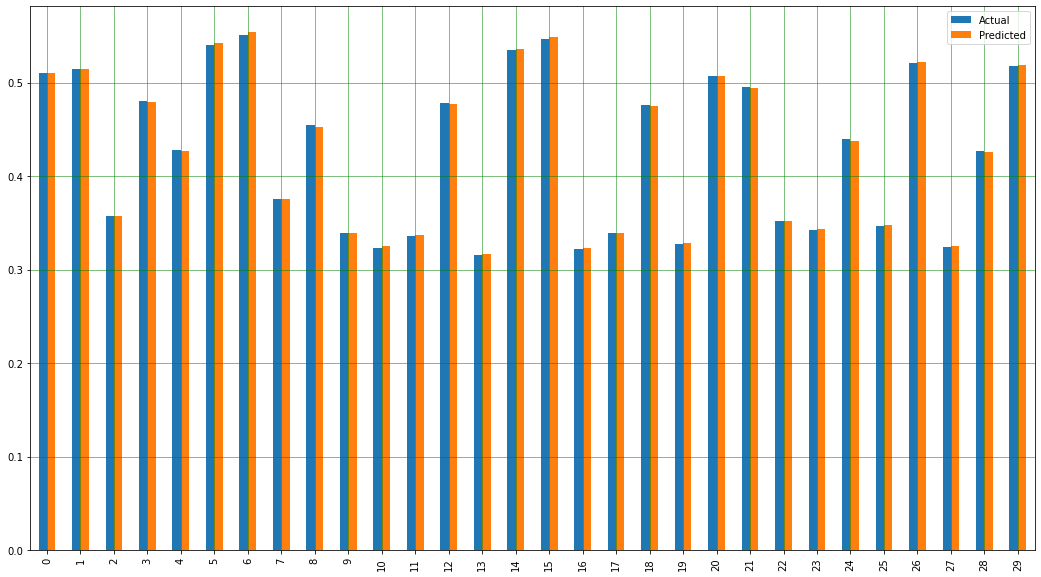

Mean Absolute Error: 0.0010815139829033057
Mean Squared Error: 1.647110379007967e-06
Root Mean Squared Error: 0.0012833979815349433


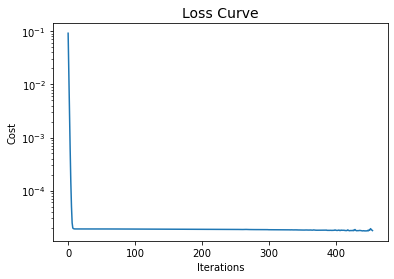

In [576]:
# predict the fitting with 2 layered identity activation
y_pred = mlp_reg_id2.predict(testx)
df_temp = pd.DataFrame({'Actual': testy, 'Predicted': y_pred})
df_temp.head()
# graph of predict and validation
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
# MSE and Loss
print('Mean Absolute Error:', metrics.mean_absolute_error(testy, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testy, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testy, y_pred)))
plt.plot(mlp_reg_id2.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.yscale('log')
plt.show()

In [9]:
###################### Integration ######################

In [25]:
# Integrate value of analytic Oscillatory
sy=symbolicval(dim,0)
print('Analytic_Oscil: ',sy)
# Integrate value of analytic Product peak
sy2=symbolicval2(dim,0)
print('Analytic_Prod: ',sy2)

# Integrate value of sigmoid activation
#weight_input, weight_output, bias_input, bias_output = coe(mlp_reg)
#sig=integral(k,dim)
#print('Sigmoid: ',sig)
# Integrate value of sigmoid activation with changed hyperparameter sgd
#weight_input, weight_output, bias_input, bias_output = coe(mlp_reg_sgd)
#sig_sgd=integral(k,dim)
#print('Sigmoid_sgd: ',sig_sgd)
# Integrate value of sigmoid activation with changed hyperparameter lbfgs
weight_input, weight_output, bias_input, bias_output = coe(mlp_reg_lb)
sig_lb=integral(k,dim)
print('Sigmoid_lbsfg: ',sig_lb)

# Integrate value of identity activation
#weight_input2, weight_output2, bias_input2, bias_output2 = coe(mlp_reg_id)
#id1=integral2(k,dim)
#print('Identity: ',id1)
# Integrate value of identity activation with changed hyperparameter sgd
#weight_input2, weight_output2, bias_input2, bias_output2 = coe(mlp_reg_id_sgd)
#id1_sgd=integral2(k,dim)
#print('Identity_sgd: ',id1_sgd)
# Integrate value of identity activation with changed hyperparameter lbfgs
weight_input2, weight_output2, bias_input2, bias_output2 = coe(mlp_reg_id_lb)
id1_lb=integral2(k,dim)
print('Identity_lbsfg: ',id1_lb)

# Integrate value of relu activation
#weight_input3, weight_output3, bias_input3, bias_output3 = coe(mlp_reg_re)
#re1=integral3(k,dim)
#print('Relu: ',re1)
# Integrate value of relu activation
#weight_input3, weight_output3, bias_input3, bias_output3 = coe(mlp_reg_re)
#re2=integral4(k,dim)
#print('Relu2: ',re2)

# Integrate value of sigmoid activation on nomalised value
#weight_input, weight_output, bias_input, bias_output = coe(mlp_reg3)
#norm=decode(oscil(x),x,1,0,integral(k,dim))
#print('Normalise_sigmoid: ',norm)
# Integrate value of sigmoid activation on nomalised value with changed hyperparameter sgd
#weight_input, weight_output, bias_input, bias_output = coe(mlp_reg3_sgd)
#norm_sgd=decode(oscil(x),x,1,0,integral(k,dim))
#print('Normalise_sigmoid_sgd: ',norm_sgd)
# Integrate value of sigmoid activation on nomalised value with changed hyperparameter lbsfg
weight_input, weight_output, bias_input, bias_output = coe(mlp_reg3_lb)
norm_lb=decode(oscil(x),x,1,0,integral(k,dim))
print('Normailise_sigmoid_lbsfg: ',norm_lb)

Analytic_Oscil:  0.29585012074689165
Analytic_Prod:  0.18836246196545642
Sigmoid_lbsfg:  0.2958410797526047


NameError: name 'mlp_reg_id_lb' is not defined

In [12]:
#print('Sigmoid Error(%): ',(abs(sig-sy)/abs(sy))*100)
#print('Sigmoid_sgd Error(%): ',(abs(sig_sgd-sy)/abs(sy))*100)
print('Sigmoid_lbsfg Log-Error(%): ',-np.log10(abs((sig_lb-sy)/sy)))
#print('Identity Error(%): ',(abs(id1-sy)/abs(sy))*100)
#print('Identity_sgd Error(%): ',(abs(id1_sgd-sy)/abs(sy))*100)
print('Identity_lbsfg Log-Error(%): ',-np.log10(abs((id1_lb-sy)/sy)))
#print('Relu Error(%): ',(abs(re1-sy)/abs(sy))*100)
#print('Relu2 Error(%): ',(abs(re2-sy)/abs(sy))*100)
#print('Norm_sig Error(%): ',(abs(norm-sy)/abs(sy))*100)
#print('Norm_sig_sgd Error(%): ',(abs(norm_sgd-sy)/abs(sy))*100)
print('Norm_sig_lbsfg Log-Error(%): ',-np.log10(abs((norm_lb-sy)/sy)))

Sigmoid_lbsfg Log-Error(%):  10.400336560411207
Identity_lbsfg Log-Error(%):  8.151461246103846
Norm_sig_lbsfg Log-Error(%):  7.929146399823324


In [152]:
##################### Data size _ correct digit check ##########################

In [253]:
# correct digits in 2 dimension
dim2={}
dig2={}
Ns=[]
dim, N, x, u, cs = init(2)
y = oscil(x)
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.05)
for i in range(6):
    N=10**(i+1)
    Ns.append(N)
    #k2 = node(dim,N)
    k2 =60
    print(k2)
    mlp_reg2 = MLPRegressor(hidden_layer_sizes=(k2,),
                       max_iter = 1000000000,activation = 'logistic',
                       solver = 'adam',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg2.fit(trainx, trainy)
    weight_input, weight_output, bias_input, bias_output = coe(mlp_reg2)
    cal=integral(k2,dim).astype(float)
    dim2[i+1]=cal
    sym=symbolicval(dim,0).astype(float)
    print((abs(sym-cal)/abs(sym)))
    dig2[i+1]=abs(np.log10((abs(sym-cal)/abs(sym))[0][0]))

60
[[0.0005449]]
60
[[0.00018149]]
60
[[0.00215678]]
60
[[0.00164038]]
60
[[0.0013071]]
60
[[0.00064916]]


In [254]:
mlp_reg2.max_iter

1000000000

0.4340632913396333
{1: array([[0.43429981]]), 2: array([[0.43414207]]), 3: array([[0.43312711]]), 4: array([[0.43335126]]), 5: array([[0.43463065]]), 6: array([[0.43434507]])}
{1: 3.2636867584058713, 2: 3.741154048039125, 3: 2.666194962878369, 4: 2.785054964326199, 5: 2.883692074465697, 6: 3.1876480377453156}


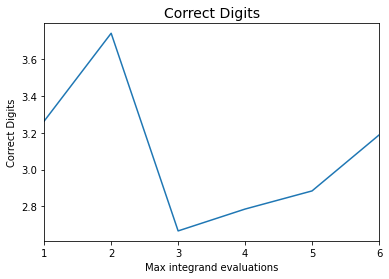

In [255]:
print(symbolicval(dim,0))
print(dim2)
print(dig2)
plt.plot(np.log10(Ns),dig2.values())
plt.title("Correct Digits", fontsize=14)
plt.xlabel('Max integrand evaluations')
plt.ylabel('Correct Digits')
plt.xlim([1,6])
#plt.ylim([0,7])
plt.show()

In [ ]:
######################### Improvement ########################

In [266]:
# node number finding
result1={}
nodes=[]
for i in range(20):
    result=[]
    k=math.floor((i+1)*20*np.sqrt(dim))
    nodes.append(k)
    # mlpregression with logistic activation
    mlp_reg1 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic',
                       solver = 'adam',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg1.fit(trainx, trainy)
    weight_input, weight_output, bias_input, bias_output = coe(mlp_reg1)
    result.append(len(mlp_reg1.loss_curve_))
        
    # mlpregression with logistic activation
    mlp_reg2 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic',
                       solver = 'adam',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg2.fit(trainx, trainy)
    weight_input, weight_output, bias_input, bias_output = coe(mlp_reg2)
    result.append(len(mlp_reg2.loss_curve_))
        
    # mlpregression with logistic activation
    mlp_reg3 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic',
                       solver = 'adam',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg3.fit(trainx, trainy)
    weight_input, weight_output, bias_input, bias_output = coe(mlp_reg3)
    result.append(len(mlp_reg3.loss_curve_))
        
    # mlpregression with logistic activation
    mlp_reg4 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic',
                       solver = 'adam',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg4.fit(trainx, trainy)
    weight_input, weight_output, bias_input, bias_output = coe(mlp_reg4)
    result.append(len(mlp_reg4.loss_curve_))
        
    # mlpregression with logistic activation
    mlp_reg5 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic',
                       solver = 'adam',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg5.fit(trainx, trainy)
    weight_input, weight_output, bias_input, bias_output = coe(mlp_reg5)
    result.append(len(mlp_reg5.loss_curve_))
    result1[k]=list(result)
    print(i+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


{40: [401, 344, 321, 413, 415], 80: [287, 311, 421, 305, 278], 120: [326, 133, 242, 227, 251], 160: [14, 14, 14, 194, 13], 200: [14, 13, 14, 14, 14], 240: [14, 14, 13, 13, 14], 280: [14, 14, 117, 14, 14], 320: [13, 14, 13, 14, 14], 360: [13, 13, 100, 13, 14], 400: [14, 13, 14, 13, 14], 440: [13, 13, 13, 13, 14], 480: [13, 13, 13, 13, 13], 520: [13, 13, 13, 13, 13], 560: [13, 13, 13, 13, 13], 600: [13, 13, 13, 13, 13], 640: [13, 13, 13, 13, 13], 680: [13, 13, 13, 13, 14], 720: [13, 13, 13, 13, 13], 760: [13, 13, 13, 13, 13], 800: [13, 13, 13, 13, 13]}


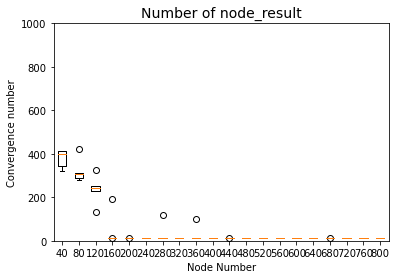

In [267]:
fig, ax = plt.subplots()
print(result1)
ax.boxplot(result1.values())
ax.set_xticklabels(result1.keys())
plt.title("Number of node_result", fontsize=14)
plt.xlabel('Node Number')
plt.ylabel('Convergence number')
plt.ylim([0,1000])
plt.show()

In [268]:
start = timeit.default_timer()
# several fitting
result1={}
num=[]
for i in range(20):
    result=[]
    num.append(i+1)
    # mlpregression with logistic activation
    mlp_reg1 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg1.fit(trainx, trainy)
    weight_input, weight_output, bias_input, bias_output = coe(mlp_reg1)
    result.append(integral(k,dim))
        
    # mlpregression with logistic activation
    mlp_reg2 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg2.fit(trainx, trainy)
    weight_input, weight_output, bias_input, bias_output = coe(mlp_reg2)
    result.append(integral(k,dim))
        
    # mlpregression with logistic activation
    mlp_reg3 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg3.fit(trainx, trainy)
    weight_input, weight_output, bias_input, bias_output = coe(mlp_reg3)
    result.append(integral(k,dim))
        
    # mlpregression with logistic activation
    mlp_reg4 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg4.fit(trainx, trainy)
    weight_input, weight_output, bias_input, bias_output = coe(mlp_reg4)
    result.append(integral(k,dim))
        
    # mlpregression with logistic activation
    mlp_reg5 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg5.fit(trainx, trainy)
    weight_input, weight_output, bias_input, bias_output = coe(mlp_reg5)
    result.append(integral(k,dim))
    result1[i+1]=list(result)
    print(i+1)
stop = timeit.default_timer()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


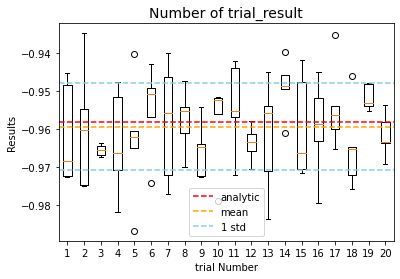

-0.9581544220017255
-0.959369622759728
0.0113964009772243
0.00126827234744005
Time:  5744.003998459026


In [269]:
ave=[]
std=[]
for i in range(len(result1.keys())):
    ave.append(np.mean(result1[i+1]))
for i in range(len(result1.keys())):
    std.append(result1[i+1])
    
fig, ax = plt.subplots()
ax.boxplot(result1.values())
ax.set_xticklabels(result1.keys())
plt.title("Number of trial_result", fontsize=14)
plt.xlabel('trial Number')
plt.ylabel('Results')
plt.axhline(y=symbolicval(dim,0), color='red', linestyle='--', label='analytic')
plt.axhline(y=np.mean(ave), color='orange', linestyle='--', label='mean')
plt.axhline(y=np.mean(ave)+np.std(std), color='skyblue', linestyle='--', label='std')
plt.axhline(y=np.mean(ave)-np.std(std), color='skyblue', linestyle='--')
labels = ["analytic", "mean","1 std"]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.show()
print(symbolicval(dim,0))
print(np.mean(ave))
print(np.std(std))
print(abs(symbolicval(dim,0)-np.mean(ave))/abs(symbolicval(dim,0)))
print('Time: ', stop - start)  

In [270]:
start = timeit.default_timer()
# several fitting identity
result={}
num=[]
for i in range(20):
    result=[]
    num.append(i+1)
    # mlpregression with logistic activation
    mlp_reg1 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'identity',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg1.fit(trainx, trainy)
    weight_input2, weight_output2, bias_input2, bias_output2 = coe(mlp_reg1)
    result.append(integral2(k,dim))
    
    # mlpregression with logistic activation
    mlp_reg2 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'identity',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg2.fit(trainx, trainy)
    weight_input2, weight_output2, bias_input2, bias_output2 = coe(mlp_reg2)
    result.append(integral2(k,dim))
    
    # mlpregression with logistic activation
    mlp_reg3 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'identity',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg3.fit(trainx, trainy)
    weight_input2, weight_output2, bias_input2, bias_output2 = coe(mlp_reg3)
    result.append(integral2(k,dim))
    
    # mlpregression with logistic activation
    mlp_reg4 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'identity',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg4.fit(trainx, trainy)
    weight_input2, weight_output2, bias_input2, bias_output2 = coe(mlp_reg4)
    result.append(integral2(k,dim))
    
    # mlpregression with logistic activation
    mlp_reg5 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'identity',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg5.fit(trainx, trainy)
    weight_input2, weight_output2, bias_input2, bias_output2 = coe(mlp_reg5)
    result.append(integral2(k,dim))
    result1[i+1]=list(result)
    print(i+1)
stop = timeit.default_timer()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


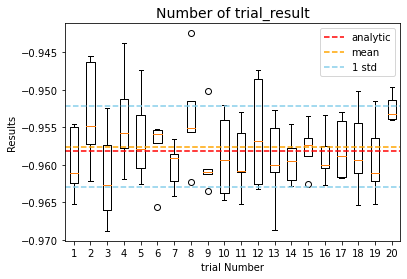

-0.9581544220017255
-0.9575979103729917
0.005416533562418337
0.0005808162191342706
Time:  2181.630711916019


In [271]:
ave=[]
std=[]
for i in range(len(result1.keys())):
    ave.append(np.mean(result1[i+1]))
for i in range(len(result1.keys())):
    std.append(result1[i+1])
    
fig, ax = plt.subplots()
ax.boxplot(result1.values())
ax.set_xticklabels(result1.keys())
plt.title("Number of trial_result", fontsize=14)
plt.xlabel('trial Number')
plt.ylabel('Results')
plt.axhline(y=symbolicval(dim,0), color='red', linestyle='--', label='analytic')
plt.axhline(y=np.mean(ave), color='orange', linestyle='--', label='mean')
plt.axhline(y=np.mean(ave)+np.std(std), color='skyblue', linestyle='--', label='std')
plt.axhline(y=np.mean(ave)-np.std(std), color='skyblue', linestyle='--')
labels = ["analytic", "mean","1 std"]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.show()
print(symbolicval(dim,0))
print(np.mean(ave))
print(np.std(std))
print(abs(symbolicval(dim,0)-np.mean(ave))/abs(symbolicval(dim,0)))
print('Time: ', stop - start)  

In [63]:
# several fitting identity
result_sig=[]
result_id=[]
error_sig=[]
error_id=[]
result=[]
num=[]
for i in range(200):
    MAX_DIM=20
    np.random
    u = np.random.random((dim,))
    cs = np.random.random((MAX_DIM,))
    cs = cs[:x.shape[1]]
    y = oscil(x)
    trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.05)
    sy=symbolicval(dim,0)
    result.append(sy)

    num.append(i+1)
    # mlpregression with logistic activation
    mlp_reg1 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'logistic',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg1.fit(trainx, trainy)
    weight_input, weight_output, bias_input, bias_output = coe(mlp_reg1)
    inte_sig=integral(k,dim)
    result_sig.append(inte_sig)
    error_sig.append(-np.log10(abs((sy-inte_sig)/sy)))
    
    # mlpregression with logistic activation
    mlp_reg2 = MLPRegressor(hidden_layer_sizes=(k,),
                       max_iter = 10000000,activation = 'identity',
                       solver = 'lbfgs',
                       learning_rate_init=0.0005, tol=1e-10)
    # fitting NN
    mlp_reg2.fit(trainx, trainy)
    weight_input2, weight_output2, bias_input2, bias_output2 = coe(mlp_reg2)
    inte_id=integral2(k,dim)
    result_id.append(inte_id)
    error_id.append(-np.log10(abs((sy-inte_id)/sy)))
    if (i+1)%10 == 0:
        print(i+1)


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


In [13]:
print(np.log10(10))
print(np.log(10))

1.0
2.302585092994046


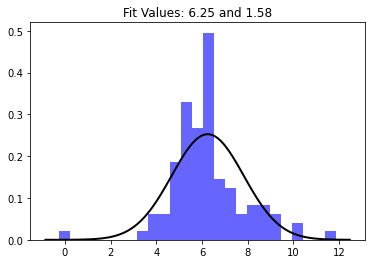

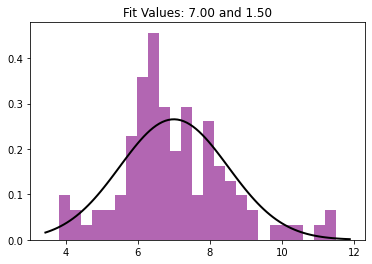

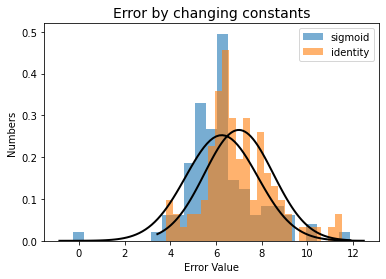

In [59]:
from scipy.stats import norm
mu_sig, std_sig = norm.fit(error_sig) 
plt.hist(error_sig, bins=25, density=True, alpha=0.6, color='b')
xmin_sig, xmax_sig = plt.xlim()
x_sig = np.linspace(xmin_sig, xmax_sig, 100)
p_sig = norm.pdf(x_sig, mu_sig, std_sig)
plt.plot(x_sig, p_sig, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu_sig, std_sig)
plt.title(title)
plt.show()

mu_id, std_id = norm.fit(error_id) 
plt.hist(error_id, bins=25, density=True, alpha=0.6, color='purple')
xmin_id, xmax_id = plt.xlim()
x_id = np.linspace(xmin_id, xmax_id, 100)
p_id = norm.pdf(x_id, mu_id, std_id)
plt.plot(x_id, p_id, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu_id, std_id)
plt.title(title)
plt.show()

fig, ax = plt.subplots()
plt.hist(error_sig, bins=25, density=True, alpha=0.6, label='sigmoid')
plt.plot(x_sig, p_sig, 'k', linewidth=2)
plt.hist(error_id, bins=25, density=True, alpha=0.6, label='identity')
plt.plot(x_id, p_id, 'k', linewidth=2)
plt.title("Error by changing constants", fontsize=14)
plt.xlabel('Error Value')
plt.ylabel('Numbers')

labels = ["sigmoid", "identity"]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.show()

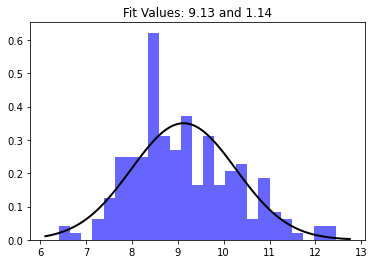

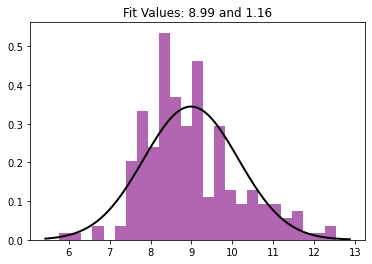

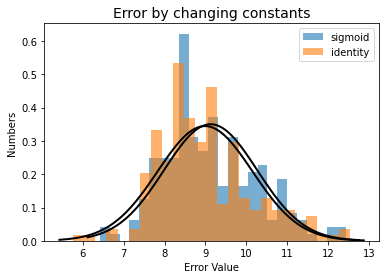

In [64]:
from scipy.stats import norm
mu_sig, std_sig = norm.fit(error_sig) 
plt.hist(error_sig, bins=25, density=True, alpha=0.6, color='b')
xmin_sig, xmax_sig = plt.xlim()
x_sig = np.linspace(xmin_sig, xmax_sig, 100)
p_sig = norm.pdf(x_sig, mu_sig, std_sig)
plt.plot(x_sig, p_sig, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu_sig, std_sig)
plt.title(title)
plt.show()

mu_id, std_id = norm.fit(error_id) 
plt.hist(error_id, bins=25, density=True, alpha=0.6, color='purple')
xmin_id, xmax_id = plt.xlim()
x_id = np.linspace(xmin_id, xmax_id, 100)
p_id = norm.pdf(x_id, mu_id, std_id)
plt.plot(x_id, p_id, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu_id, std_id)
plt.title(title)
plt.show()

fig, ax = plt.subplots()
plt.hist(error_sig, bins=25, density=True, alpha=0.6, label='sigmoid')
plt.plot(x_sig, p_sig, 'k', linewidth=2)
plt.hist(error_id, bins=25, density=True, alpha=0.6, label='identity')
plt.plot(x_id, p_id, 'k', linewidth=2)
plt.title("Error by changing constants", fontsize=14)
plt.xlabel('Error Value')
plt.ylabel('Numbers')

labels = ["sigmoid", "identity"]
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.show()

In [10]:
def loop(shape, numberofloop):
    return 1
print(-np.log10(abs((0.1001-0.10011)/0.1001)))

9.211339872308265


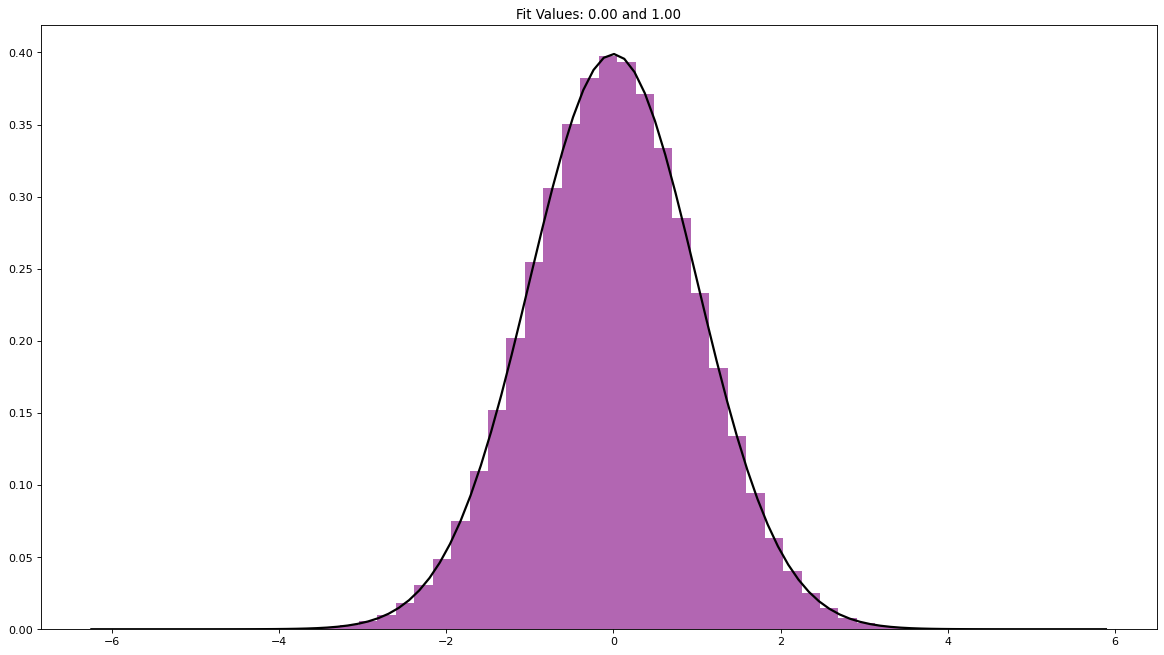

In [15]:
from scipy.stats import norm
from matplotlib.pyplot import figure

figure(figsize=(18, 10), dpi=80)
s=np.random.normal(0, 1, 100000000)
plt.hist(s, bins=50, density=True, alpha=0.6, color='purple')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(0, 1)
plt.title(title)
plt.show()

In [247]:
# limited integration
al = 0
be = 1
def lim_integral(dim,fix):
    if fix > 0:
        dim=dim-fix
        cons=np.dot(x.T[dim:].T,weight_input[dim:])
        if dim == 1:
            result2=[]
            for i in range(len(cons)):
                temp = []
                for l in range(k):
                    po = (polylog(dim,-np.exp(-(bias_input[l]+cons[i,l])-weight_input[0][l]*al))
                          -polylog(dim,-np.exp(-(bias_input[l]+cons[i,l])-weight_input[0][l]*be)))       
                    temp.append(weight_output[l]*((be-al)+po/weight_input[0][l]))
                result2.append((bias_output*(be-al)+sum(temp))[0])
            return result2
        else :
            temp=[]
            poly ={}
            result=[]
            for i in range(len(lims(dim)[1])):
                weight=[]
                for j in range(len(lims(dim)[0][i])):
                    arg = weight_input[j]*lims(dim)[0][i][j]
                    weight.append(arg)
                po=np.zeros((cons.shape[0],k))
                for j in range(cons.shape[0]):
                    temp2=[]
                    for l in range(k):
                        temp2.append(lims(dim)[1][i]*polylog(dim,-np.exp(-(bias_input+cons[j])-sum(weight))[l]))
                    po[j,]=np.array(temp2)
                poly[i]=po
            product=1
            for j in range(dim):
                product = product*weight_input[j]
            for l in range(len(lims(dim)[1])):
                if l == 0:
                    sumpoly=poly[l]
                else :
                    sumpoly=sumpoly+poly[l]
            for i in range(cons.shape[0]):
                result.append(float((bias_output+np.dot(1+sumpoly[i,]/product,weight_output))[0]))
        return result
    else:
        if dim == 1:
            temp = []
            for i in range(k):
                po = (polylog(dim,-np.exp(-bias_input[i]-weight_input[0][i]*al))
                      -polylog(dim,-np.exp(-bias_input[i]-weight_input[0][i]*be)))       
                temp.append(weight_output[i]*((be-al)+po/weight_input[0][i]))
            result = bias_output*(be-al)+sum(temp)
            return result[0]
        else :
            temp=[]
            poly =[]
            for i in range(len(lims(dim)[1])):
                weight=[]
                for j in range(len(lims(dim)[0][i])):
                    arg = weight_input[j]*lims(dim)[0][i][j]
                    weight.append(arg)
                po=[]
                for j in range(k):
                    po.append(lims(dim)[1][i]*polylog(dim,-np.exp(-bias_input-sum(weight))[j]))
                poly.append(np.array(po))
            product=1
            for j in range(len(weight_input)):
                product = product*weight_input[j]
            temp.append(1+sum(poly)/product)
            result=bias_output+np.dot(temp,weight_output)
        return float(result[0][0])

In [ ]:
print(dim)
sy=symbolicval(dim,0)
print('Analytic_Oscil: ',sy)
weight_input, weight_output, bias_input, bias_output = coe(mlp_reg_lb)
sig_lb=integral(k,dim)
print('Sigmoid_lbsfg: ',sig_lb)
sy_f=symbolicval(dim-1,1)
print('Analytic_fix_Oscil: ',sy_f)
start = timeit.default_timer()
sig_lb_f=lim_integral(dim,1)
stop = timeit.default_timer()
print('Sigmoid_lbsfg_fix: ',sig_lb_f)
print('Time: ', stop - start)  

4
Analytic_Oscil:  -0.913344645975653
Sigmoid_lbsfg:  -0.9130496594759617
Analytic_fix_Oscil:  [-0.92557952 -0.9457689  -0.94833023 ... -0.8299696  -0.94271889
 -0.94054548]


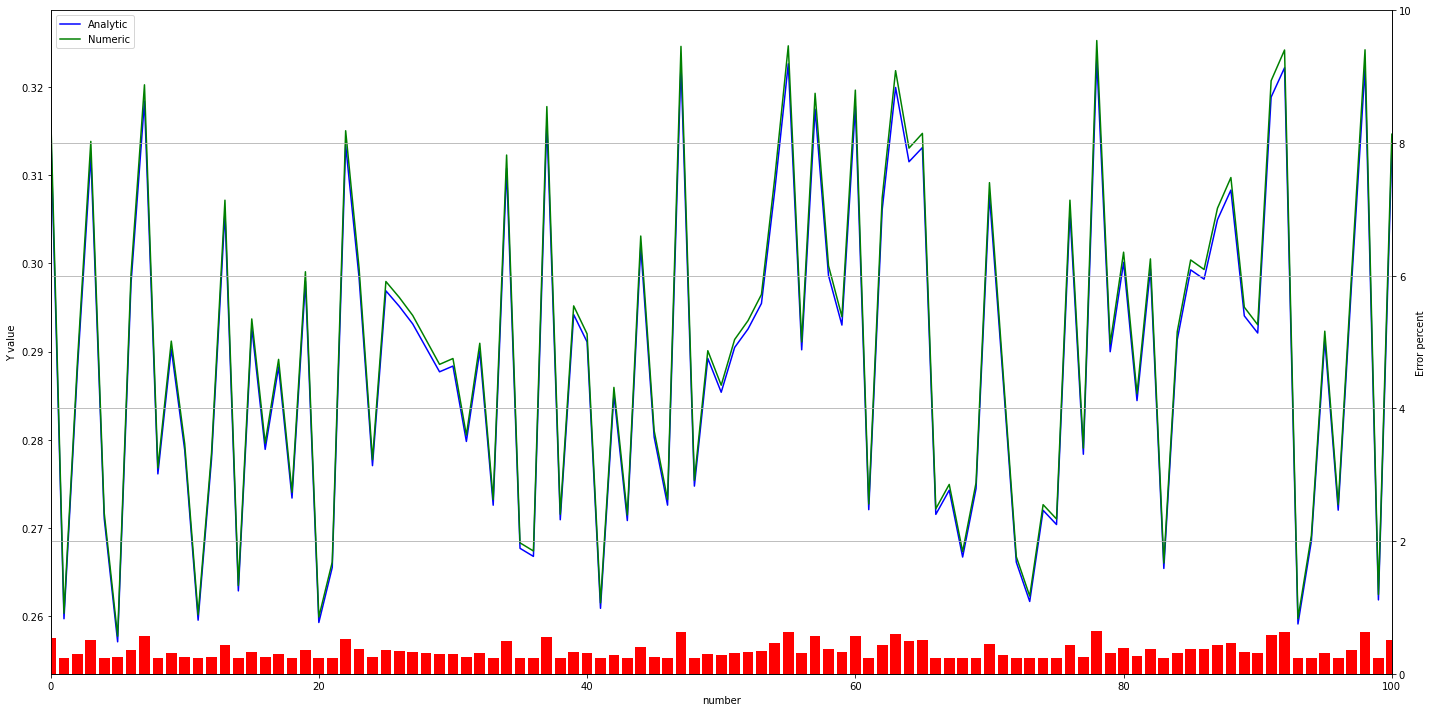

In [283]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

# plot with properties
line1 = ax1.plot(list(range(len(sy_f))), sy_f, color='b', label='Analytic') 
line2 = ax1.plot(list(range(len(sy_f))), sig_lb_f, color='g', label='Numeric')
line3 = ax2.bar(list(range(len(sy_f))), ratio, color='r', label='Error')

# plot without x sorting
ax1.set_xlabel('number')
ax1.set_ylabel('Y value')
ax2.set_ylabel('Error percent')

# set y limit
ax1.set_xlim(0,100)
ax2.set_ylim(0, 10)

# plot legend for all y axis
lines = line1 + line2 
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc=2)

plt.grid(True)

fig.tight_layout()
#fig.savefig('Fig.png', dpi=1000)
#fig.savefig('Fig.eps', format='eps', dpi=1000)
plt.show()

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

# analytical integral value
def symbolicval3(ndiff, nfix):
    arest = cs[ndiff:]
    adiff = cs[:ndiff]
    norm = 2**ndiff*np.prod(np.sin(adiff/2))/np.prod(adiff)
    arg = 2*np.pi*u[0] + sum(adiff)/2
    cons = []
    for i in range(nfix):
        j=i+1
        conval = input("Input %d trial fixed dimension x value (0<x<1): " %j)
        cons.append(float(conval)*arest[i])
    if nfix == 0:
        F = norm*np.cos(arg)
    else:
        xt=x.T[ndiff:]
        F = norm*np.cos(arg+sum(cons))
    return F

# limited integration for custom input
al = 0
be = 1
def lim_integral2(dim,fix):
    if fix > 0:
        dim=dim-fix
        cons=0
        xd=x.T[dim:]
        wd=weight_input[dim:][0]
        for i in range(fix):
            j=i+1
            conval = input("Input %d trial fixed dimension x value (0<x<1): " %j)
            fixcon=find_nearest(xd[i],float(conval))*wd
            cons=cons+fixcon
            print('closest value: ',find_nearest(xd[i],float(conval)))
        if dim == 1:
            temp = []
            for i in range(k):
                po = (polylog(dim,-np.exp(-(bias_input[i]+cons[i])-weight_input[0][i]*al))
                      -polylog(dim,-np.exp(-(bias_input[i]+cons[i])-weight_input[0][i]*be)))       
                temp.append(weight_output[i]*((be-al)+po/weight_input[0][i]))
            result = bias_output*(be-al)+sum(temp)
            return result[0]
        else :
            temp=[]
            poly =[]
            for i in range(len(lims(dim)[1])):
                weight=[]
                for j in range(len(lims(dim)[0][i])):
                    arg = weight_input[j]*lims(dim)[0][i][j]
                    weight.append(arg)
                po=[]
                for j in range(k):
                    po.append(lims(dim)[1][i]*polylog(dim,-np.exp(-(bias_input+cons)-sum(weight))[j]))
                poly.append(np.array(po))
            product=1
            for j in range(dim):
                product = product*weight_input[j]
            temp.append(1+sum(poly)/product)
            result=bias_output+np.dot(temp,weight_output)
        return float(result[0][0])
    else:
        if dim == 1:
            temp = []
            for i in range(k):
                po = (polylog(dim,-np.exp(-bias_input[i]-weight_input[0][i]*al))
                      -polylog(dim,-np.exp(-bias_input[i]-weight_input[0][i]*be)))       
                temp.append(weight_output[i]*((be-al)+po/weight_input[0][i]))
            result = bias_output*(be-al)+sum(temp)
            return result[0]
        else :
            temp=[]
            poly =[]
            for i in range(len(lims(dim)[1])):
                weight=[]
                for j in range(len(lims(dim)[0][i])):
                    arg = weight_input[j]*lims(dim)[0][i][j]
                    weight.append(arg)
                po=[]
                for j in range(k):
                    po.append(lims(dim)[1][i]*polylog(dim,-np.exp(-bias_input-sum(weight))[j]))
                poly.append(np.array(po))
            product=1
            for j in range(len(weight_input)):
                product = product*weight_input[j]
            temp.append(1+sum(poly)/product)
            result=bias_output+np.dot(temp,weight_output)
        return float(result[0][0])